# 1. Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

# for Q-Q plots
import pylab
import scipy.stats as stats

# boston house dataset for the demo
from sklearn.datasets import load_boston

# import several machine learning algorithms
# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
#from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
#from xgboost import XGBRegressor
# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc,
                             precision_score, recall_score, roc_curve, precision_recall_curve,
                             precision_recall_fscore_support, f1_score,
                             precision_recall_fscore_support)

# to scale the features
from sklearn.preprocessing import MinMaxScaler

# to evaluate the models
from sklearn.metrics import roc_auc_score

# to separate data into train and test
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn import model_selection
from sklearn.model_selection import train_test_split


pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# display various ranges 
pd.options.display.float_format = '{:.4f}'.format

print("Setup complete...")

Setup complete...


----------------------------------------------------------------------

# 2. Import dataset

### 2.1 Lending Club

In [3]:
df1 = pd.read_csv('loan.csv')
print(df1.shape)
df1.head()

(2260668, 145)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,nan,nan,2500,2500,2500.0000,36 months,13.5600,84.9200,C,C1,Chef,10+ years,RENT,55000.0000,Not Verified,Dec-2018,Current,n,nan,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.2400,0.0000,Apr-2001,1.0000,nan,45.0000,9.0000,1.0000,4341,10.3000,34.0000,w,2386.0200,2386.0200,167.0200,167.0200,113.9800,53.0400,0.0000,0.0000,0.0000,Feb-2019,84.9200,Mar-2019,Feb-2019,0.0000,nan,1,Individual,nan,nan,NaN,0.0000,0.0000,16901.0000,2.0000,2.0000,1.0000,2.0000,2.0000,12560.0000,69.0000,2.0000,7.0000,2137.0000,28.0000,42000.0000,1.0000,11.0000,2.0000,9.0000,1878.0000,34360.0000,5.9000,0.0000,0.0000,140.0000,212.0000,1.0000,1.0000,0.0000,1.0000,nan,2.0000,nan,0.0000,2.0000,5.0000,3.0000,3.0000,16.0000,7.0000,18.0000,5.0000,9.0000,0.0000,0.0000,0.0000,3.0000,100.0000,0.0000,1.0000,0.0000,60124.0000,16901.0000,36500.0000,18124.0000,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
1,nan,nan,30000,30000,30000.0000,60 months,18.9400,777.2300,D,D2,Postmaster,10+ years,MORTGAGE,90000.0000,Source Verified,Dec-2018,Current,n,nan,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.5200,0.0000,Jun-1987,0.0000,71.0000,75.0000,13.0000,1.0000,12315,24.2000,44.0000,w,29387.7500,29387.7500,1507.1100,1507.1100,612.2500,894.8600,0.0000,0.0000,0.0000,Feb-2019,777.2300,Mar-2019,Feb-2019,0.0000,nan,1,Individual,nan,nan,NaN,0.0000,1208.0000,321915.0000,4.0000,4.0000,2.0000,3.0000,3.0000,87153.0000,88.0000,4.0000,5.0000,998.0000,57.0000,50800.0000,2.0000,15.0000,2.0000,10.0000,24763.0000,13761.0000,8.3000,0.0000,0.0000,163.0000,378.0000,4.0000,3.0000,3.0000,4.0000,nan,4.0000,nan,0.0000,2.0000,4.0000,4.0000,9.0000,

### 2.2. Titanic

In [4]:
df2 = pd.read_csv('Train_Titanic.csv')
print(df2.shape)
df2.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S


### 2.3 House price

In [5]:
df3 = pd.read_csv('houseprice.csv')
print(df3.shape)
df3.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 2.4. Boston house price

In [6]:
boston_dataset = load_boston()
df4 = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
print(df4.shape)
df4.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1.0000,296.0000,15.3000,396.9000,4.9800
1,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2.0000,242.0000,17.8000,396.9000,9.1400
2,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2.0000,242.0000,17.8000,392.8300,4.0300
3,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3.0000,222.0000,18.7000,394.6300,2.9400
4,0.0691,0.0000,2.1800,0.0000,0.4580,7.1470,54.2000,6.0622,3.0000,222.0000,18.7000,396.9000,5.3300


In [29]:
org_df1 = df1.copy()
org_df2 = df2.copy()
org_df3 = df3.copy()
org_df4 = df4.copy()

----------------------------------------------------------------------

# 10. Engineering mixed variables

## Engineering mixed variables

We've seen that mixed variables are those which values contain both numbers and labels (see section 2: types of variables for a re-cap).

How can we engineer this type of variable to use it in machine learning?

What we need to do in these cases is extract the categorical part in one variable, and the numerical part in a different variable. Therefore, we obtain 2 variables from the original one.

**Scenario 1**
Some mixed variables, will contain among their values either strings or numbers, but not the 2 together. This means that the value of an observation is either a string, or a number, but not a string and a number.

There are cases, like I explained in section 2, in which the variable is in nature numerical, and whenever the number could not be established for an observation, a code (i.e., a string) is utilised to define that a) information could not be retrieved and b) why it could not be retrieved.

In situations like this, we can simply extract the string into a categorical variable, and the numbers into a numerical variable. We will end up with 2 variables that contain all the information contained in the single mixed variable. After this, we should engineer the numerical and categorical variables as we would do normally for those types of variables.

**Scenario 2**
In other cases, the variable will contain strings and numbers together for the same observation. After inspecting the variable, we can decide whether we should treat these types as categorical variables, or whether it will be more predictive if we separate the categorical and the numerical parts in different variables.


We will see below examples of these 2 scenarios, and how we can go about them.

For the first scenario I will simulate some data:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# let's load the Lending Club dataset with the variable "Number of installment accounts opened in past 24 months"
# installment accounts are those that, at the moment of acquiring them, there is a set period and amount
# of repayments agreed between the lender and borrower. An example of this is a car loan, or a student loan.
# the borrower knows that they are going to pay a certain, fixed amount over, for example 36 months.

data = pd.read_csv('loan.csv', usecols=['id','open_il_24m'])

# let's replace the NaN with the fictitious codes described below:
# 'A': couldn't identify the person
# 'B': no relevant data
# 'C': person seems not to have any account open
# this is exactly what we did in section 2 of this course for the lecture on mixed types of variables

# select which observations we will replace with each code
indeces_b = data[data.open_il_24m.isnull()].sample(100000, random_state=44).index
indeces_c = data[data.open_il_24m.isnull()].sample(300000, random_state=42).index

# replace NA with the fictitious code
data.open_il_24m.fillna('A', inplace=True)
data.loc[indeces_b, 'open_il_24m']='B'
data.loc[indeces_c, 'open_il_24m']='C'

In [3]:
# let's inspect the mixed variable

data.open_il_24m.unique()

array(['C', 'A', 'B', 0.0, 1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 9.0, 7.0, 8.0,
       13.0, 10.0, 19.0, 11.0, 12.0, 14.0, 15.0], dtype=object)

The variable now is mixed: it contains both numbers and the three codes that we just created for this simulation.

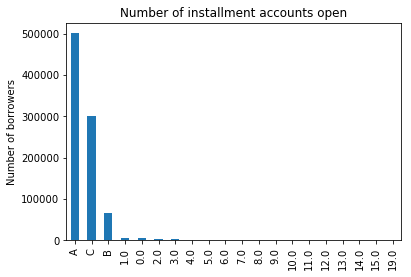

In [4]:
# the variable is also discrete in nature. A person can have 1, 2 accounts but not 2.3 accounts
# let's inspect the number of observations per value of the variable

fig = data.open_il_24m.value_counts().plot.bar()
fig.set_title('Number of installment accounts open')
fig.set_ylabel('Number of borrowers')

This is how a mixed variable looks like!

In [5]:
data.open_il_24m.head()

0    C
1    A
2    A
3    A
4    A
Name: open_il_24m, dtype: object

### Engineering mixed types of variables

Below I will demonstrate how to engineer mixed types of variables

In [6]:
# we create 2 variables, a numerical one containing the numerical part, and
# a categorical variable with the codes (strings)

data['open_il_24m_numerical'] = np.where(data.open_il_24m.str.isdigit(), data.open_il_24m, np.nan)
data['open_il_24m_categorical'] = np.where(data.open_il_24m.str.isdigit(), np.nan, data.open_il_24m,)

data.head()

,id,open_il_24m,open_il_24m_numerical,open_il_24m_categorical
0,1077501,C,NaN,C
1,1077430,A,NaN,A
2,1077175,A,NaN,A
3,1076863,A,NaN,A
4,1075358,A,NaN,A


The categorical variable captures the categorical part of the mixed original variable. Where the categorical variable contains a value, the numerical variable contains NA, and vice versa. See below.

In [7]:
# let's inspect those instances of the dataset where numerical is not null
# we can see that when the numerical variable is not null the categorical is null
# and vice versa

data.dropna(subset = ['open_il_24m_numerical'], axis=0)

,id,open_il_24m,open_il_24m_numerical,open_il_24m_categorical
466285,68444620,0,0,NaN
466286,68547583,1,1,NaN
466287,67849662,0,0,NaN
466288,68506885,2,2,NaN
466289,68341763,4,4,NaN
466290,68416935,2,2,NaN
466291,68466916,1,1,NaN
466292,68407277,1,1,NaN
466293,68426831,0,0,NaN
466294,68377020,0,0,NaN


And now we are ready to use those variables in machine learning. We should pre-process them as we learnt in previous sections. For example,  we could fill the missing values of the categorical part with the new category 'Missing'. And then we could fill the NA of the numerical  part with a value far out in the distribution.

### Other types of mixed variables

In [8]:
# let's load again the titanic dataset for demonstration

data = pd.read_csv('titanic.csv', usecols = ['Ticket', 'Cabin', 'Survived'])
data.head()

,Survived,Ticket,Cabin
0,0,A/5 21171,NaN
1,1,PC 17599,C85
2,1,STON/O2. 3101282,NaN
3,1,113803,C123
4,0,373450,NaN


The variables Ticket and Cabin, are not strictly mixed in the sense that they do not contain numbers OR strings on different observations. They contains both numbers and strings in the same observation. Perhaps, if we separate them, we can add some information to the dataset. 

Let's have a look at what we could do:

In [9]:
# for Cabin, it is relatively straightforward, we can extract the letters and the numbers in different variables

data['Cabin_numerical'] = data.Cabin.str.extract('(\d+)') # captures numerical part
data['Cabin_categorical'] = data['Cabin'].str[0] # captures the first letter

data[['Cabin', 'Cabin_numerical', 'Cabin_categorical']].head()

C:\Users\Sole\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


,Cabin,Cabin_numerical,Cabin_categorical
0,NaN,NaN,NaN
1,C85,85,C
2,NaN,NaN,NaN
3,C123,123,C
4,NaN,NaN,NaN


In [10]:
# ticket is not as clear...but we could still capture the first part of the ticket as a code (category)
# and the second part of the ticket as numeric

data.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [11]:
# extract the last bit of ticket as number
data['Ticket_numerical'] = data.Ticket.apply(lambda s: s.split()[-1])
data['Ticket_numerical'] = np.where(data.Ticket_numerical.str.isdigit(), data.Ticket_numerical, np.nan)

# extract the first part of ticket as category
data['Ticket_categorical'] = data.Ticket.apply(lambda s: s.split()[0])
data['Ticket_categorical'] = np.where(data.Ticket_categorical.str.isdigit(), np.nan, data.Ticket_categorical)

data[['Ticket', 'Ticket_numerical','Ticket_categorical']].head(10)

,Ticket,Ticket_numerical,Ticket_categorical
0,A/5 21171,21171,A/5
1,PC 17599,17599,PC
2,STON/O2. 3101282,3101282,STON/O2.
3,113803,113803,NaN
4,373450,373450,NaN
5,330877,330877,NaN
6,17463,17463,NaN
7,349909,349909,NaN
8,347742,347742,NaN
9,237736,237736,NaN


In [12]:
# let's compare the number of categories of the newly designed variables

print('Ticket_original no of labels: ', len(data.Ticket.unique()))
print('Cabin_original no of labels: ', len(data.Cabin.unique()))

print('Ticket_categorical no of labels: ', len(data.Ticket_categorical.unique()))
print('Cabin_categorical no of labels: ', len(data.Cabin_categorical.unique()))


Ticket_original no of labels:  681
Cabin_original no of labels:  148
Ticket_categorical no of labels:  44
Cabin_categorical no of labels:  9


We can see how we reduced quite a bit the number of categories with this simple pre-processing of the variables. Whether these newly designed variables are or not predictive of survival, remains to be tested. I will come back to this in the last section of this course. Meanwhile, go ahead and built machine learning algorithms with these new variables, and see if they boost the performance.

# 11. Engineering datetime variables

## Engineering Dates

Date variables are special type of categorical variable. By their own nature, date variables will contain a multitude of different labels, each one corresponding to a specific date and sometimes time. Date variables, when preprocessed properly can highly enrich a dataset. For example, from a date variable we can extract:

- Month
- Quarter
- Semester
- Day (number)
- Day of the week
- Is Weekend?
- Hr
- Time differences in years, months, days, hrs, etc.

It is important to understand that date variables should not be used as the categorical variables we have been working so far when building a machine learning model. Not only because they have a multitude of categories, but also because when we actually use the model to score a new observation, this observation will most likely be in the future, an therefore its date label, will be different than the ones contained in the training set and therefore the ones used to train the machine learning algorithm.

=============================================================================

Let's look at how to pre-process date variables in a real life example.

### Lending Club

**Lending Club** is a peer-to-peer Lending company based in the US. They match people looking to invest money with people looking to borrow money. When investors invest their money through Lending Club, this money is passed onto borrowers, and when borrowers pay their loans back, the capital plus the interest passes on back to the investors. It is a win for everybody as they can get typically lower loan rates and higher investor returns.

If you want to learn more about Lending Club follow this link:
https://www.lendingclub.com/

The Lending Club dataset contains complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. Features (aka variables) include credit scores, number of finance inquiries, address including zip codes and state, and collections among others. Collections indicates whether the customer has missed one or more payments and the team is trying to recover their money.
The file is a matrix of about 890 thousand observations and 75 variables. More detail on this dataset can be found in Kaggle's website: https://www.kaggle.com/wendykan/lending-club-loan-data

Let's go ahead and have a look!

In [1]:
import pandas as pd
import numpy as np

import datetime

In [2]:
# let's load the Lending Club dataset with a few selected columns
# just a few rows to speed things up

use_cols = ['issue_d', 'last_pymnt_d']
data = pd.read_csv('loan.csv', usecols=use_cols, nrows=10000)
data.head()

,issue_d,last_pymnt_d
0,Dec-2011,Jan-2015
1,Dec-2011,Apr-2013
2,Dec-2011,Jun-2014
3,Dec-2011,Jan-2015
4,Dec-2011,Jan-2016


In [3]:
# now let's parse the dates, currently coded as strings, into datetime format

data['issue_dt'] = pd.to_datetime(data.issue_d)
data['last_pymnt_dt'] = pd.to_datetime(data.last_pymnt_d)

data[['issue_d','issue_dt','last_pymnt_d', 'last_pymnt_dt']].head()

,issue_d,issue_dt,last_pymnt_d,last_pymnt_dt
0,Dec-2011,2011-12-01,Jan-2015,2015-01-01
1,Dec-2011,2011-12-01,Apr-2013,2013-04-01
2,Dec-2011,2011-12-01,Jun-2014,2014-06-01
3,Dec-2011,2011-12-01,Jan-2015,2015-01-01
4,Dec-2011,2011-12-01,Jan-2016,2016-01-01


In [4]:
# Extracting Month from date

data['issue_dt_month'] = data['issue_dt'].dt.month

data[['issue_dt', 'issue_dt_month']].head()

,issue_dt,issue_dt_month
0,2011-12-01,12
1,2011-12-01,12
2,2011-12-01,12
3,2011-12-01,12
4,2011-12-01,12


In [5]:
data[['issue_dt', 'issue_dt_month']].tail()

,issue_dt,issue_dt_month
9995,2011-08-01,8
9996,2011-08-01,8
9997,2011-08-01,8
9998,2011-08-01,8
9999,2011-08-01,8


In [6]:
# Extract quarter from date variable

data['issue_dt_quarter'] = data['issue_dt'].dt.quarter

data[['issue_dt', 'issue_dt_quarter']].head()

,issue_dt,issue_dt_quarter
0,2011-12-01,4
1,2011-12-01,4
2,2011-12-01,4
3,2011-12-01,4
4,2011-12-01,4


In [7]:
data[['issue_dt', 'issue_dt_quarter']].tail()

,issue_dt,issue_dt_quarter
9995,2011-08-01,3
9996,2011-08-01,3
9997,2011-08-01,3
9998,2011-08-01,3
9999,2011-08-01,3


In [8]:
# We could also extract semester

data['issue_dt_semester'] = np.where(data.issue_dt_quarter.isin([1,2]),1,2)
data.head()

,issue_d,last_pymnt_d,issue_dt,last_pymnt_dt,issue_dt_month,issue_dt_quarter,issue_dt_semester
0,Dec-2011,Jan-2015,2011-12-01,2015-01-01,12,4,2
1,Dec-2011,Apr-2013,2011-12-01,2013-04-01,12,4,2
2,Dec-2011,Jun-2014,2011-12-01,2014-06-01,12,4,2
3,Dec-2011,Jan-2015,2011-12-01,2015-01-01,12,4,2
4,Dec-2011,Jan-2016,2011-12-01,2016-01-01,12,4,2


In [9]:
# day - numeric from 1-31

data['issue_dt_day'] = data['issue_dt'].dt.day

data[['issue_dt', 'issue_dt_day']].head()

,issue_dt,issue_dt_day
0,2011-12-01,1
1,2011-12-01,1
2,2011-12-01,1
3,2011-12-01,1
4,2011-12-01,1


In [10]:
# day of the week - from 0 to 6

data['issue_dt_dayofweek'] = data['issue_dt'].dt.dayofweek

data[['issue_dt', 'issue_dt_dayofweek']].head()

,issue_dt,issue_dt_dayofweek
0,2011-12-01,3
1,2011-12-01,3
2,2011-12-01,3
3,2011-12-01,3
4,2011-12-01,3


In [11]:
data[['issue_dt', 'issue_dt_dayofweek']].tail()

,issue_dt,issue_dt_dayofweek
9995,2011-08-01,0
9996,2011-08-01,0
9997,2011-08-01,0
9998,2011-08-01,0
9999,2011-08-01,0


In [12]:
# day of the week - name

data['issue_dt_dayofweek'] = data['issue_dt'].dt.weekday_name

data[['issue_dt', 'issue_dt_dayofweek']].head()

,issue_dt,issue_dt_dayofweek
0,2011-12-01,Thursday
1,2011-12-01,Thursday
2,2011-12-01,Thursday
3,2011-12-01,Thursday
4,2011-12-01,Thursday


In [13]:
data[['issue_dt', 'issue_dt_dayofweek']].tail()

,issue_dt,issue_dt_dayofweek
9995,2011-08-01,Monday
9996,2011-08-01,Monday
9997,2011-08-01,Monday
9998,2011-08-01,Monday
9999,2011-08-01,Monday


In [14]:
# was the application done on the weekend?

data['issue_dt_is_weekend'] = np.where(data['issue_dt_dayofweek'].isin(['Sunday', 'Saturday']), 1,0)
data[['issue_dt', 'issue_dt_dayofweek','issue_dt_is_weekend']].head()

,issue_dt,issue_dt_dayofweek,issue_dt_is_weekend
0,2011-12-01,Thursday,0
1,2011-12-01,Thursday,0
2,2011-12-01,Thursday,0
3,2011-12-01,Thursday,0
4,2011-12-01,Thursday,0


In [15]:
data[data.issue_dt_is_weekend==1][['issue_dt', 'issue_dt_dayofweek','issue_dt_is_weekend']].head()

,issue_dt,issue_dt_dayofweek,issue_dt_is_weekend
4269,2011-10-01,Saturday,1
4280,2011-10-01,Saturday,1
4287,2011-10-01,Saturday,1
4290,2011-10-01,Saturday,1
4293,2011-10-01,Saturday,1


In [16]:
# extract year 

data['issue_dt_year'] = data['issue_dt'].dt.year

data[['issue_dt', 'issue_dt_year']].head()

,issue_dt,issue_dt_year
0,2011-12-01,2011
1,2011-12-01,2011
2,2011-12-01,2011
3,2011-12-01,2011
4,2011-12-01,2011


In [17]:
# perhaps more interestingly, extract the date difference between 2 dates

data['issue_dt'] - data['last_pymnt_dt']


0      -1127 days
1       -487 days
2       -913 days
3      -1127 days
4      -1492 days
5      -1127 days
6      -1492 days
7      -1127 days
8       -122 days
9       -336 days
10      -548 days
11      -640 days
12      -213 days
13     -1127 days
14      -670 days
15     -1127 days
16     -1127 days
17      -517 days
18     -1158 days
19      -213 days
20     -1339 days
21      -640 days
22     -1127 days
23      -670 days
24      -305 days
25      -275 days
26            NaT
27      -366 days
28      -487 days
29     -1096 days
          ...    
9970   -1096 days
9971   -1188 days
9972    -519 days
9973    -274 days
9974   -1096 days
9975   -1004 days
9976    -274 days
9977   -1096 days
9978   -1096 days
9979    -762 days
9980   -1492 days
9981    -397 days
9982   -1004 days
9983     -31 days
9984    -974 days
9985   -1096 days
9986   -1096 days
9987    -731 days
9988    -853 days
9989    -915 days
9990    -244 days
9991   -1096 days
9992   -1096 days
9993    -458 days
9994   -16

In [18]:
# same as above capturing just the time difference
(data['last_pymnt_dt']-data['issue_dt']).dt.days.head()

0    1127.0
1     487.0
2     913.0
3    1127.0
4    1492.0
dtype: float64

In [19]:
# or the time difference to today, or any other day of reference

(datetime.datetime.today() - data['issue_dt']).head()

0   2215 days 17:19:22.155930
1   2215 days 17:19:22.155930
2   2215 days 17:19:22.155930
3   2215 days 17:19:22.155930
4   2215 days 17:19:22.155930
Name: issue_dt, dtype: timedelta64[ns]

In [20]:
(datetime.datetime.today() - data['issue_dt']).tail()

9995   2337 days 17:19:22.173943
9996   2337 days 17:19:22.173943
9997   2337 days 17:19:22.173943
9998   2337 days 17:19:22.173943
9999   2337 days 17:19:22.173943
Name: issue_dt, dtype: timedelta64[ns]

**Similarly, if this variable had time as well, we could calculate, at what time the application was done in hrs for example, and then segregate it in: morning-afternoon-evening.**

Very common date differences used in the industry include "age" using "date of birth" and the "time of application" (i.e., how old was the applicant when they applied for a loan). Other examples include how long the applicant has lived at th declared address.

### Note

Once preprocessed in these ways, the variables are ready to be used in machine learning models following typical preprocessing of numerical or categorical variables, as shown in previous and future sections in this course.